In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data19 = pd.read_csv('./Podatki/pn2019.csv', delimiter=';', encoding='mbcs')
data20 = pd.read_csv('./Podatki/pn2020.csv', delimiter=';', encoding='mbcs')
data = pd.concat([data19, data20])

month=data.DatumPN.str.split(".").str[1].astype('int')
data['month']=month
seasons=["pomlad","poletje","jesen","zima"]
data_by_season=[]
data_by_season.append(data[(data.month>=4)&(data.month<=6)])
data_by_season.append(data[(data.month>=7)&(data.month<=9)])
data_by_season.append(data[(data.month>=10)&(data.month<=12)])
data_by_season.append(data[(data.month>=1)&(data.month<=3)])

Koordiante so v 20. in 21. stoplcu

In [3]:
x = data.iloc[:, 20:21]
y = data.iloc[:, 21:22]
xy = data.iloc[:, 20:22]

In [4]:
def narisi_graf(array_gostote, title=""):
    # Gauss Kruger koordiante
    array_gostote = np.array(array_gostote)
    X, Y, GP = array_gostote.T

    fig, ax = plt.subplots(figsize=(15, 10))
    heatmap = ax.pcolormesh(X, Y, GP, shading='auto')       #  heat map
    fig.colorbar(heatmap, ax=ax, label="opis barvne lestvice")
    ax.set_title(title)                                          # naslov grafa
    ax.set_xlabel("$x$ os")
    ax.set_ylabel("$y$ os")

In [5]:
x = x[x.GeoKoordinataX != 0] # Odstrani pomakljive podatke
y = y[y.GeoKoordinataY != 0]
xy = xy[xy.GeoKoordinataY != 0]
xy = xy[xy.GeoKoordinataX != 0]
xmin, xmax, ymin, ymax = 90000, 110000, 450000, 480000  # Ljubljana

In [6]:
def gostota(x0, x1, y0, y1, xy):
    go = len(xy[(xy.GeoKoordinataX < x1) & (xy.GeoKoordinataX >= x0) & (xy.GeoKoordinataY < y1) & (xy.GeoKoordinataY >= y0)])
    return go

resX = 150
resY = 150

arr_gostota = []
for cx in range(xmin // resX * resX, xmax + resX, resX):
    vrstica = []
    for cy in range(ymin // resY * resY, ymax + resY, resY):
        go = gostota(cx, cx + resX, cy, cy + resY, xy)
        vrstica.append((cx, cy, go))
    arr_gostota.append(vrstica)

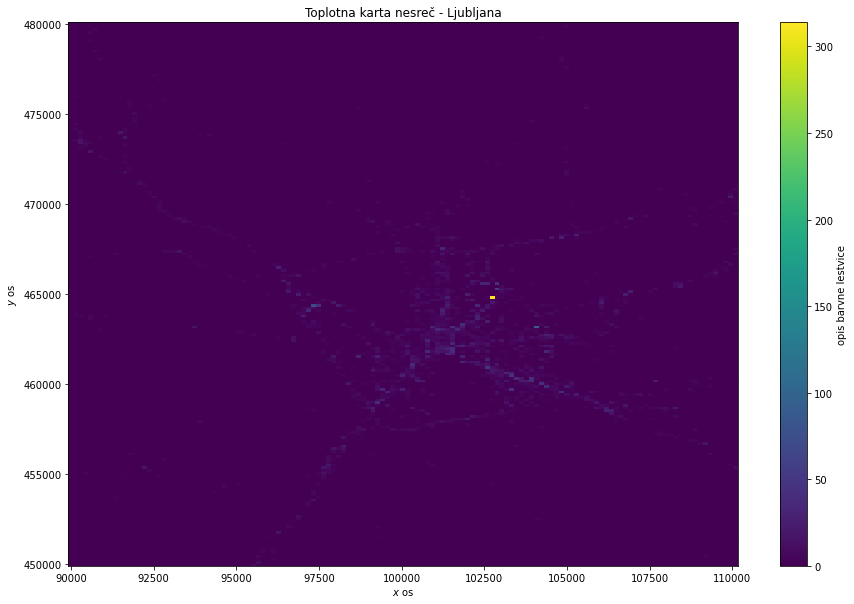

In [7]:
narisi_graf(arr_gostota, "Toplotna karta nesreč - Ljubljana")



Rumena pika na karti je BTC -> tam se je zgodilo okrog 300 nesrec v 2019 in 2020

In [ ]:
x = x[x.GeoKoordinataX != 0] # Odstrani pomakljive podatke
y = y[y.GeoKoordinataY != 0]
xy = xy[xy.GeoKoordinataY != 0]
xy = xy[xy.GeoKoordinataX != 0]
xmin, ymin = xy.min()
xmax, ymax = xy.max()
#xmin, xmax, ymin, ymax = 90000, 110000, 450000, 480000  # Ljubljana

resX = 750
resY = 750

for dbs, s in zip(data_by_season, seasons):
    xy = dbs.iloc[:, 20:22]
    arr_gostota = []
    for cx in range(xmin // resX * resX, xmax + resX, resX):
        vrstica = []
        for cy in range(ymin // resY * resY, ymax + resY, resY):
            go = gostota(cx, cx + resX, cy, cy + resY, xy)
            vrstica.append((cx, cy, go))
        arr_gostota.append(vrstica)
    narisi_graf(arr_gostota, s)